# Ava Northrop's Data Science Cookbook

**TABLE OF RECIPES:**
1) DataFrame Merging

2) DataFrame Grouping

3) Plotting basics

4) API basics

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import requests

# Importing all the necessary packages at the beginning for convenience/concision.

Be sure to download the other necessary files (sleep-2023-01-04.json, sleep-2023-02-03.json, and sleep_score.csv) and have them available in the same directory as this notebook before trying to follow along!

# DATAFRAME MERGING:

This recipe will show you the various ways to merge two datasets/dataframes into one. 

In [44]:
# Read in the desired data files

jan23_df= pd.read_json('sleep-2023-01-04.json')
feb23_df= pd.read_json('sleep-2023-02-03.json')
score_df= pd.read_csv('sleep_score.csv')

In [21]:
# Inspect the dataframes:

jan23_df
# You can use .head() to only look at the first five rows

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,levels,mainSleep
0,40056243186,2023-02-03,2023-02-03T00:24:00.000,2023-02-03T07:41:00.000,26220000,0,387,50,0,437,97,stages,0,auto_detected,"{'summary': {'deep': {'count': 3, 'minutes': 5...",True
1,40044273804,2023-02-02,2023-02-02T00:04:30.000,2023-02-02T07:49:30.000,27900000,0,410,55,0,465,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 5...",True
2,40020359529,2023-01-31,2023-01-30T23:53:00.000,2023-01-31T08:39:30.000,31560000,0,446,80,0,526,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 3, 'minutes': 5...",True
3,40006664973,2023-01-30,2023-01-30T00:09:30.000,2023-01-30T07:28:00.000,26280000,0,376,62,1,438,93,stages,0,auto_detected,"{'summary': {'deep': {'count': 2, 'minutes': 6...",True
4,39995702665,2023-01-29,2023-01-28T23:33:30.000,2023-01-29T12:22:30.000,46140000,0,670,99,0,769,94,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 9...",True
5,39984247151,2023-01-28,2023-01-28T00:07:00.000,2023-01-28T12:26:00.000,44340000,0,642,97,0,739,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 1...",True
6,39970451062,2023-01-27,2023-01-27T00:51:00.000,2023-01-27T08:03:00.000,25920000,0,375,57,0,432,93,stages,0,auto_detected,"{'summary': {'deep': {'count': 2, 'minutes': 7...",True
7,39956933606,2023-01-26,2023-01-26T00:46:00.000,2023-01-26T07:38:00.000,24720000,0,356,56,0,412,97,stages,0,auto_detected,"{'summary': {'deep': {'count': 2, 'minutes': 7...",True
8,39942860421,2023-01-25,2023-01-25T00:43:30.000,2023-01-25T07:33:00.000,24540000,0,368,41,5,409,99,stages,0,auto_detected,"{'summary': {'deep': {'count': 5, 'minutes': 7...",True
9,39931515860,2023-01-24,2023-01-23T23:50:00.000,2023-01-24T07:38:00.000,28080000,0,419,49,0,468,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 7...",True


In [16]:
feb23_df

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,levels,mainSleep
0,40448127399,2023-03-05,2023-03-05T11:29:00.000,2023-03-05T12:36:30.000,4020000,0,59,8,0,67,88,classic,2,auto_detected,"{'summary': {'restless': {'count': 2, 'minutes...",False
1,40447874602,2023-03-05,2023-03-04T22:37:00.000,2023-03-05T10:20:00.000,42180000,0,608,95,0,703,93,stages,0,auto_detected,"{'summary': {'deep': {'count': 5, 'minutes': 7...",True
2,40436753365,2023-03-04,2023-03-04T15:52:30.000,2023-03-04T17:59:30.000,7620000,0,116,11,0,127,91,classic,2,auto_detected,"{'summary': {'restless': {'count': 5, 'minutes...",False
3,40434738944,2023-03-04,2023-03-04T01:34:00.000,2023-03-04T11:42:30.000,36480000,0,553,55,0,608,98,stages,0,auto_detected,"{'summary': {'deep': {'count': 3, 'minutes': 5...",True
4,40420053655,2023-03-03,2023-03-03T00:34:00.000,2023-03-03T07:46:00.000,25920000,0,388,44,0,432,95,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 7...",True
5,40406751742,2023-03-02,2023-03-02T00:29:00.000,2023-03-02T08:41:00.000,29520000,0,437,55,0,492,95,stages,0,auto_detected,"{'summary': {'deep': {'count': 7, 'minutes': 7...",True
6,40392207628,2023-03-01,2023-02-28T23:29:00.000,2023-03-01T07:39:30.000,29400000,0,419,71,0,490,91,stages,0,auto_detected,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True
7,40381242724,2023-02-28,2023-02-27T23:47:30.000,2023-02-28T08:19:30.000,30720000,0,453,59,5,512,93,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 5...",True
8,40366136786,2023-02-27,2023-02-27T00:08:30.000,2023-02-27T07:43:00.000,27240000,0,387,67,0,454,93,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 5...",True
9,40354743519,2023-02-26,2023-02-26T00:09:00.000,2023-02-26T11:31:30.000,40920000,0,610,72,0,682,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 7, 'minutes': 8...",True


In [45]:
score_df

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,40540394349,2023-03-12T09:26:30Z,69,17,18,34,72.0,69,0.086788
1,40528997504,2023-03-11T10:51:30Z,86,21,21,44,82.0,71,0.060114
2,40515244788,2023-03-10T07:38:00Z,61,17,12,32,42.0,69,0.098555
3,40505557454,2023-03-09T08:50:30Z,78,22,16,40,90.0,67,0.063790
4,40492589575,2023-03-08T07:43:30Z,82,21,20,41,60.0,67,0.068718
...,...,...,...,...,...,...,...,...,...
995,23679216941,2019-08-31T06:29:30Z,74,20,18,36,61.0,64,0.057217
996,23670103983,2019-08-30T06:28:00Z,68,17,16,35,NaN,62,0.057263
997,23670103982,2019-08-29T06:29:30Z,75,21,20,34,64.0,62,0.096569
998,23640007142,2019-08-28T06:26:30Z,69,20,16,33,34.0,59,0.041847


The first two dataframes contain similar information about my sleeping for the first two months of 2023, while the third contains different sleep information dating from 2019-2023. 

My goal is to combine these into one dataframe that contains the information from both types of datasets, but only for the first two months of 2023. 

The first step is to combine the two datasets with the same columns into one longer dataframe. 

To do this, I'm going to use **pd.concat** 

In [48]:
early_23_df= pd.concat([jan23_df, feb23_df])
# Make sure to save this as a new dataframe

# Inspect the new df:
early_23_df

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,levels,mainSleep
0,40056243186,2023-02-03,2023-02-03T00:24:00.000,2023-02-03T07:41:00.000,26220000,0,387,50,0,437,97,stages,0,auto_detected,"{'summary': {'deep': {'count': 3, 'minutes': 5...",True
1,40044273804,2023-02-02,2023-02-02T00:04:30.000,2023-02-02T07:49:30.000,27900000,0,410,55,0,465,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 5...",True
2,40020359529,2023-01-31,2023-01-30T23:53:00.000,2023-01-31T08:39:30.000,31560000,0,446,80,0,526,96,stages,0,auto_detected,"{'summary': {'deep': {'count': 3, 'minutes': 5...",True
3,40006664973,2023-01-30,2023-01-30T00:09:30.000,2023-01-30T07:28:00.000,26280000,0,376,62,1,438,93,stages,0,auto_detected,"{'summary': {'deep': {'count': 2, 'minutes': 6...",True
4,39995702665,2023-01-29,2023-01-28T23:33:30.000,2023-01-29T12:22:30.000,46140000,0,670,99,0,769,94,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 9...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,40115863458,2023-02-08,2023-02-07T23:36:30.000,2023-02-08T07:39:30.000,28980000,0,419,64,3,483,91,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 4...",True
29,40094612062,2023-02-06,2023-02-06T06:16:00.000,2023-02-06T07:46:30.000,5400000,0,81,9,0,90,90,classic,2,auto_detected,"{'summary': {'restless': {'count': 3, 'minutes...",True
30,40082668063,2023-02-05,2023-02-05T02:07:00.000,2023-02-05T12:18:30.000,36660000,0,537,74,0,611,95,stages,0,auto_detected,"{'summary': {'deep': {'count': 3, 'minutes': 9...",True
31,40069128437,2023-02-04,2023-02-04T01:04:00.000,2023-02-04T11:21:30.000,37020000,0,558,59,0,617,98,stages,0,auto_detected,"{'summary': {'deep': {'count': 4, 'minutes': 1...",True


This new dataframe looks good! It simply stacked the rows of the two original dataframes together.

Now, I want to combine this dataframe with the one containing sleep scores. 

To do this, I will use the **merge** method:

**new_df=1.merge(df_2, on='column', how='kind of join')**

This method combines dataframes "horizontally" on a shared column. There are several kinds of merging/joining that you can do: 

- OUTER: This merge retains all rows from both dataframes. If a row only exists in one df, the columns relating to the                  other are filled with NaNs.
- LEFT: This merge retains all rows from the "left" dataframe (df_1), regardless of if they have a match in df_2. 
- RIGHT: This merge retains all rows from the "right" dataframe (df_2).
- INNER: This merge only retains rows that exist in BOTH dataframes.

For my purposes, I only want to keep information in my dataframe about the first two months of 2023, so I'm going to use a LEFT join (making sure to use the early_23_df as the left df). 

This means the **how** argument will look like **how='left'**

Both dataframes have a timestamp columns, but they don't match up perfectly, so I'm going to create a new column in each that is a datetime object of just the date. Once I have this, the **on** argument will look like **on='Date'**

In [53]:
early_23_df['dt']=pd.to_datetime(early_23_df['dateOfSleep']) # Creating a datetime object
early_23_df['Date']=early_23_df['dt'].dt.date # Creating a date column 

In [52]:
# Repeating the steps with the score df
score_df['dt']=pd.to_datetime(score_df['timestamp'])
score_df['Date']=score_df['dt'].dt.date

In [55]:
# Finally merging! 

sleep_23_df= early_23_df.merge(score_df, on='Date', how='left')

# Inspect the new df:
sleep_23_df

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,...,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,dt_y
0,40056243186,2023-02-03,2023-02-03T00:24:00.000,2023-02-03T07:41:00.000,26220000,0,387,50,0,437,...,4.005624e+10,2023-02-03T07:41:00Z,76.0,20.0,19.0,37.0,52.0,63.0,0.059977,2023-02-03 07:41:00+00:00
1,40044273804,2023-02-02,2023-02-02T00:04:30.000,2023-02-02T07:49:30.000,27900000,0,410,55,0,465,...,4.004427e+10,2023-02-02T07:49:30Z,74.0,18.0,19.0,37.0,52.0,61.0,0.049409,2023-02-02 07:49:30+00:00
2,40020359529,2023-01-31,2023-01-30T23:53:00.000,2023-01-31T08:39:30.000,31560000,0,446,80,0,526,...,4.002036e+10,2023-01-31T08:39:30Z,78.0,21.0,17.0,40.0,52.0,58.0,0.062500,2023-01-31 08:39:30+00:00
3,40006664973,2023-01-30,2023-01-30T00:09:30.000,2023-01-30T07:28:00.000,26280000,0,376,62,1,438,...,4.000666e+10,2023-01-30T07:28:00Z,76.0,19.0,21.0,36.0,64.0,58.0,0.088167,2023-01-30 07:28:00+00:00
4,39995702665,2023-01-29,2023-01-28T23:33:30.000,2023-01-29T12:22:30.000,46140000,0,670,99,0,769,...,3.999570e+10,2023-01-29T12:22:30Z,79.0,18.0,18.0,43.0,90.0,57.0,0.078622,2023-01-29 12:22:30+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,40115863458,2023-02-08,2023-02-07T23:36:30.000,2023-02-08T07:39:30.000,28980000,0,419,64,3,483,...,4.011586e+10,2023-02-08T07:39:30Z,76.0,20.0,19.0,37.0,44.0,66.0,0.111686,2023-02-08 07:39:30+00:00
61,40094612062,2023-02-06,2023-02-06T06:16:00.000,2023-02-06T07:46:30.000,5400000,0,81,9,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
62,40082668063,2023-02-05,2023-02-05T02:07:00.000,2023-02-05T12:18:30.000,36660000,0,537,74,0,611,...,4.008267e+10,2023-02-05T12:18:30Z,80.0,22.0,13.0,45.0,96.0,65.0,0.069307,2023-02-05 12:18:30+00:00
63,40069128437,2023-02-04,2023-02-04T01:04:00.000,2023-02-04T11:21:30.000,37020000,0,558,59,0,617,...,4.006913e+10,2023-02-04T11:21:30Z,88.0,23.0,19.0,46.0,110.0,64.0,0.043265,2023-02-04 11:21:30+00:00


I now have all of the information from both the sleep files *and* the score file for the Jan and Feb of 2023 in the same dataframe for easy comparisons, calculations, and further wrangling.

# DATAFRAME GROUPING:

This recipe focuses on manipulating dataframes to show and aggregate the information you really want using **groupby** and **pivot table** methods. 

My main goal is to create a grouped df or pivot table, showing the average minutes asleep and average overall sleep score for each day of the week. 

First, I need a new column showing the day of the week. This is easily done using the datetime method **dt.weekday**

In [59]:
sleep_23_df['dayOfWeek']=sleep_23_df['dt_x'].dt.weekday 
# There are two 'dt' columns, so the _x refers to information from the early_23 dt column

There are two ways to group/sort dataframes (groupby and pivot_table). 

I'll start with **.groupby**:

**new_df=df.groupby(['sorting column'])[['value column', 'value column']].func()**

- sorting column: This is the column that you want to group the data by.
- value columns: These columns are additional values you want to see in your new df
- func(): This is a function (e.g. mean or sum) applied to the value columns.

(Pandas grouby documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [65]:
grouped_df= sleep_23_df.groupby(['dayOfWeek'])[['minutesAsleep', 'overall_score']].mean()
# This groups the df by the dayOfWeek column, and averages the minutes asleep and overall score.

# Inspect the new df:
grouped_df

,minutesAsleep,overall_score
dayOfWeek,,
0,405.375000,79.857143
1,454.285714,82.142857
2,467.000000,81.875000
3,345.000000,79.666667
4,437.700000,78.100000
5,500.300000,84.500000
6,518.400000,80.200000


Perfect, this new df tells me that, on average: I sleep the most on Saturdays, but have the best sleep score on Fridays.

There's another way I could do this though, using a **pivot table:**

**new_df=df.pivot_table(values=['value column', 'value column'], index='sorting column', aggfunc='function')**
- value columns, sorting column, and function refer to the same as in groupby

(Pandas pivot table documentation: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [76]:
pivot_df= sleep_23_df.pivot_table(values=['minutesAsleep','overall_score'], index='dayOfWeek', aggfunc='mean')
# This creates a pivot table with day of the week as the index and averages of minutes asleep and overall scores as the values.

# Inspect the new df:
pivot_df

,minutesAsleep,overall_score
dayOfWeek,,
0,405.375000,79.857143
1,454.285714,82.142857
2,467.000000,81.875000
3,345.000000,79.666667
4,437.700000,78.100000
5,500.300000,84.500000
6,518.400000,80.200000


The two grouped dataframes above give the same results! 

Both methods have many more arguments explained in the documentation that can create more complex grouped dataframes.

# PLOTTING BASICS:

This recipe uses matplotlib to make basic line plots.

(Remember to import pyplot using " from matplotlib import pyplot as plt ")

I want to create a line plot that shows the fluctuation of minutes asleep across the days of the week. 

The barebones line plot starts as **plt.plot(x, y)**

(matplotlib line plot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

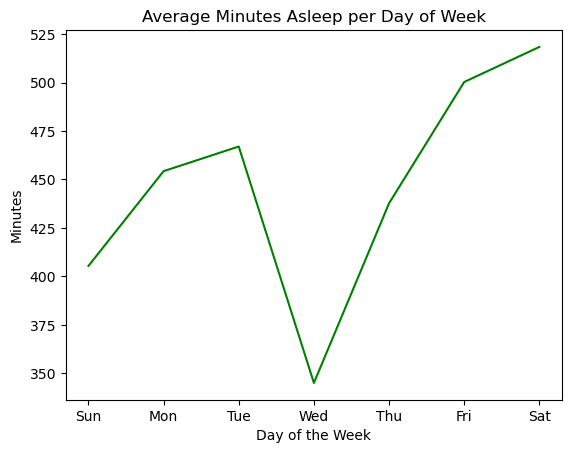

In [88]:
days=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# Since the days of the week are stored numerically, I'm creating a list of names to use in my plot.

plt.plot(days, pivot_df['minutesAsleep'], color='green')
# Creates a plot using the days list as the x values, the minutesAsleep column for the y values, and assigns a color to the line
# You can plot multiple lines on one graphy by adding multiple lines of code like the one above.

plt.xlabel('Day of the Week')  # Labels the x-axis
plt.ylabel('Minutes')  # Labels the y-axis
plt.title('Average Minutes Asleep per Day of Week')  # Creates a title for the chart
#plt.legend()             You can use this if you have multiple lines so people can tell what they represent.

# Don't forget to call plt.show !!! 
# But call it at the very end. Anything above .show() will be put on the same graph
plt.show()

I can create a similar graph to visualize the how my overall sleep score changes throughout the week: 

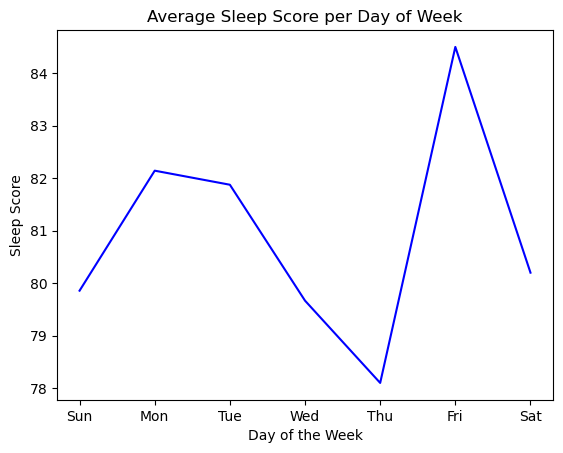

In [89]:
plt.plot(days, pivot_df['overall_score'], color='blue')

plt.xlabel('Day of the Week') 
plt.ylabel('Sleep Score')
plt.title('Average Sleep Score per Day of Week')

plt.show()

I can't plot these on the same graph to any real benefit because the scales are so different (80 vs 450), and the amount of variation is quite different (6 vs almost 200). Instead, I can just compare the shape of these two graphs. I can see that they follow the same general pattern (which makes sense), although the main dip in sleep score happens the day after the dip in amount of sleep.

# API BASICS:

This recipe shows the basics requesting data from an API.

We're switching gears here and not working with my sleep data anymore. Instead, we're going to investigate an API that holds information about books! 

The goal here is to understand the basic way to request and handle data from an API. 

(Make sure to import **json** and **requests** before trying this code!)

To start, you'll need the base url for the API: 'https://openlibrary.org'

From here, you'll need to figure out how the specific API is structured, but for this one, we have a "search url" that we can add on that allows us to pull specific information. 

In [92]:
# Creating variables for the base and search urls
base_url= 'https://openlibrary.org'
search_url='/search.json?'

Now we can actually make a request. I want to find a list of all the works by one of my favorite authors: Maggie Stiefvater.

To start, I want to get the general information the API has about her. 

**requests.get(url).json()** is the general form: you're requesting the API to get information from a specific url.

In [95]:
# Creating a variable for the request
stiefvater= requests.get(base_url + search_url + 'author=Maggie+Stiefvater').json() 
# Don't forget the .json() so the response is readable!

# Inspect the response:
stiefvater

{'numFound': 165,
 'start': 0,
 'numFoundExact': True,
 'docs': [{'key': '/works/OL17814556W',
   'type': 'work',
   'seed': ['/books/OL26801268M',
    '/books/OL26403871M',
    '/books/OL27099423M',
    '/books/OL26943789M',
    '/books/OL26855875M',
    '/books/OL29371536M',
    '/works/OL17814556W',
    '/subjects/families',
    '/subjects/magic',
    '/subjects/fiction',
    '/subjects/miracles',
    '/subjects/miracle_workers',
    '/subjects/cousins',
    '/subjects/juvenile_fiction',
    '/subjects/pirate_radio_broadcasting',
    '/subjects/radio_broadcasting',
    '/subjects/mexican_americans',
    '/subjects/mexican_american_teenagers',
    '/subjects/history',
    "/subjects/children's_fiction",
    '/subjects/mexican_americans_fiction',
    '/subjects/family_fiction',
    '/subjects/radio_operators_fiction',
    '/subjects/colorado_fiction',
    '/subjects/fantasy_fiction',
    '/subjects/nyt:young-adult-hardcover=2017-10-29',
    '/subjects/new_york_times_bestseller',
    '

There's a lot of information here, so how do we get what we want? 

We have to study the structure of this response to figure out how to access the right information. 

The response is a bunch of nested dictionaries, and the title of each book seems to be paired with the "title" key, inside the "docs" dictionary. 

In [98]:
stiefvater_works=[] # Initializing an empty list that will store the names of her works

for i in stiefvater['docs']: 
    # The 'docs' dictionary has a list of dicts for each work, so I'm iterating over each index/work
    stiefvater_works.append(i['title'])
    # Then I can search within the dict for that particular work and access the value attached to the key "title"

# Inspect the list to see the titles of all her works that the API has information on
stiefvater_works

['All the Crooked Saints',
 'The Raven Boys',
 'Wen der Rabe ruft',
 'Call Down the Hawk',
 'Raven King',
 'Spirit Animals Book 2',
 'The Dream Thieves',
 'Shiver',
 'Wo das Dunkel schläft',
 'Wer die Lilie träumt',
 'Was die Spiegel wissen',
 'Forever',
 'Hunted',
 'Sinner',
 'Shiver',
 'The Raven Boys',
 'Dreamer Trilogy #2',
 'Linger',
 'Lament',
 'The Raven Boys',
 'The Scorpio Races',
 'The Scorpio Races',
 'Linger',
 'Blue Lilly, Lilly Blue',
 'Shiver. Wolves Of Mercy Falls 1',
 'Forever (Wolves of Mercy Falls, Book 3)',
 'Linger',
 'Blue lily, lily Blue',
 'Opal (a Raven Cycle Story)',
 'Blue Lily, Lily Blue',
 'The Raven King (The Raven Cycle, Book 4)',
 'The Raven King (The Raven Cycle, Book 4)',
 'Call Down the Hawk',
 "Pip Bartlett's guide to magical creatures",
 'Lamento',
 'The Dream Thieves (The Raven Cycle, Book 2)',
 'Złodzieje snów',
 'Shiver',
 'Shiver, Linger, Forever',
 'Shiver',
 'Shiver, Linger, Forever, Sinner',
 'Ballade. Der Tanz der Feen',
 "Raven's Prophecy T

Now I have a list of all her works!

I can also access specific information about a work by studying the structure of the response and accessing the correct dictionaries and lists. 

For example, if I wanted to get the subjects one of my favorite books is about, I can search withing that work's dictionary for "subject". 

In [116]:
stiefvater['docs'][0]['subject']

['Families',
 'Magic',
 'Fiction',
 'Miracles',
 'Miracle workers',
 'Cousins',
 'Juvenile fiction',
 'Pirate radio broadcasting',
 'Radio broadcasting',
 'Mexican Americans',
 'Mexican American teenagers',
 'History',
 "Children's fiction",
 'Mexican americans, fiction',
 'Family, fiction',
 'Radio operators, fiction',
 'Colorado, fiction',
 'Fantasy fiction',
 'nyt:young-adult-hardcover=2017-10-29',
 'New York Times bestseller']

There's so much more you can do with APIs, but this is a quick introduction to the basic form of requests and handling the recieved data. 